In [3]:
import pandas as pd

In [4]:
df = pd.read_csv("anime.csv")

In [10]:
df

,anime_id,name,genre,type,episodes,rating,members
0,32281,Kimi no Na wa.,"Drama, Romance, School, Supernatural",Movie,1,9.37,200630
1,5114,Fullmetal Alchemist: Brotherhood,"Action, Adventure, Drama, Fantasy, Magic, Mili...",TV,64,9.26,793665
2,28977,Gintama°,"Action, Comedy, Historical, Parody, Samurai, S...",TV,51,9.25,114262
3,9253,Steins;Gate,"Sci-Fi, Thriller",TV,24,9.17,673572
4,9969,Gintama&#039;,"Action, Comedy, Historical, Parody, Samurai, S...",TV,51,9.16,151266
...,...,...,...,...,...,...,...
12289,9316,Toushindai My Lover: Minami tai Mecha-Minami,Hentai,OVA,1,4.15,211
12290,5543,Under World,Hentai,OVA,1,4.28,183
12291,5621,Violence Gekiga David no Hoshi,Hentai,OVA,4,4.88,219
12292,6133,Violence Gekiga Shin David no Hoshi: Inma Dens...,Hentai,OVA,1,4.98,175


In [11]:
 
print(df.isnull().sum())


anime_id      0
name          0
genre        62
type         25
episodes      0
rating      230
members       0
dtype: int64


In [19]:
 
print(df.info())

# Summary statistics
print(df.describe(include='all'))

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12294 entries, 0 to 12293
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   anime_id  12294 non-null  int64  
 1   name      12294 non-null  object 
 2   genre     12294 non-null  object 
 3   type      12294 non-null  object 
 4   episodes  12294 non-null  int64  
 5   rating    12294 non-null  float64
 6   members   12294 non-null  int64  
dtypes: float64(1), int64(3), object(3)
memory usage: 672.5+ KB
None
            anime_id              name   genre   type      episodes  \
count   12294.000000             12294   12294  12294  12294.000000   
unique           NaN             12292    3265      7           NaN   
top              NaN  Saru Kani Gassen  Hentai     TV           NaN   
freq             NaN                 2     823   3787           NaN   
mean    14058.221653               NaN     NaN    NaN     12.040101   
std     11455.294701               NaN     NaN

In [25]:
df['rating'] = df['rating'].fillna(df['rating'].mean())
df['genre'] = df['genre'].fillna('Unknown')
df['type'] = df['type'].fillna('Unknown')


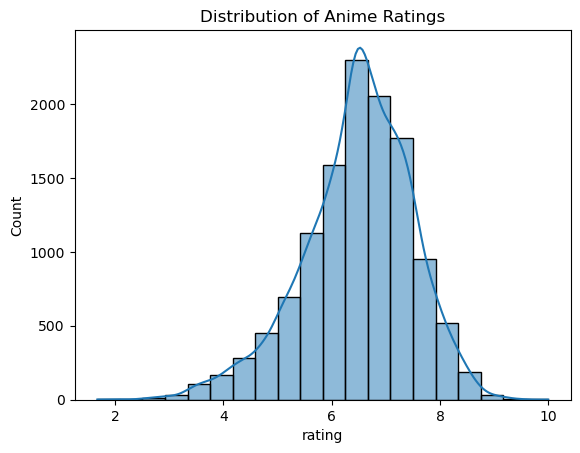

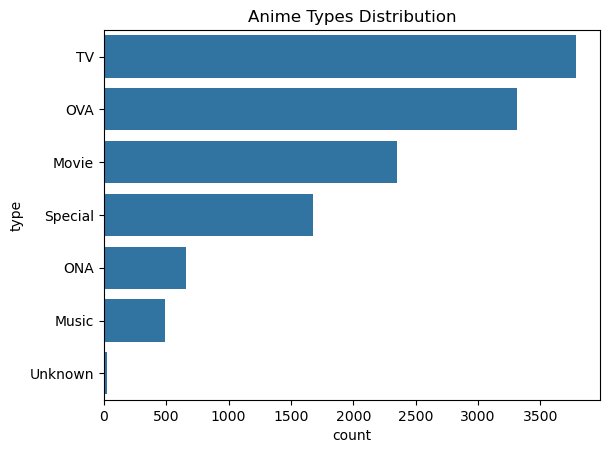

In [26]:
import matplotlib.pyplot as plt
import seaborn as sns

# Rating distribution
sns.histplot(df['rating'], bins=20, kde=True)
plt.title("Distribution of Anime Ratings")
plt.show()

# Types of anime
sns.countplot(y='type', data=df, order=df['type'].value_counts().index)
plt.title("Anime Types Distribution")
plt.show()


In [27]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import OneHotEncoder
import pandas as pd

In [28]:

features_df = df[['name', 'genre', 'type', 'rating', 'episodes']].copy()

In [29]:

tfidf = TfidfVectorizer(stop_words='english')
genre_matrix = tfidf.fit_transform(features_df['genre'])


In [30]:

encoder = OneHotEncoder()
type_encoded = encoder.fit_transform(features_df[['type']]).toarray()

In [31]:
from sklearn.preprocessing import MinMaxScaler
import numpy as np

In [32]:
scaler = MinMaxScaler()
num_features = scaler.fit_transform(features_df[['rating', 'episodes']])


In [33]:
from scipy.sparse import hstack


In [35]:

feature_matrix = hstack([genre_matrix, type_encoded, num_features])

In [36]:
from sklearn.metrics.pairwise import cosine_similarity

In [37]:
cosine_sim = cosine_similarity(feature_matrix, feature_matrix)

In [38]:

tfidf = TfidfVectorizer(stop_words='english')
genre_matrix = tfidf.fit_transform(df['genre'])


encoder = OneHotEncoder()
type_encoded = encoder.fit_transform(df[['type']]).toarray()


In [39]:

scaler = MinMaxScaler()
num_features = scaler.fit_transform(df[['rating', 'episodes']])


feature_matrix = hstack([genre_matrix, type_encoded, num_features])


In [40]:
cosine_sim = cosine_similarity(feature_matrix, feature_matrix)


In [47]:
# =============================
# 🧩 Import Required Libraries
# =============================
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import OneHotEncoder, MinMaxScaler
from sklearn.metrics.pairwise import cosine_similarity
from scipy.sparse import hstack

# =============================
# 📂 Load and Clean the Dataset
# =============================
df = pd.read_csv("anime.csv")

# Basic cleaning
df['rating'] = df['rating'].fillna(df['rating'].mean())
df['genre'] = df['genre'].fillna('Unknown')
df['type'] = df['type'].fillna('Unknown')
df['episodes'] = df['episodes'].replace('Unknown', '0')
df['episodes'] = pd.to_numeric(df['episodes'], errors='coerce').fillna(0).astype(int)

# =============================
# 🎯 Feature Extraction
# =============================

# 1️⃣ TF-IDF for Genres
tfidf = TfidfVectorizer(stop_words='english')
genre_matrix = tfidf.fit_transform(df['genre'])

# 2️⃣ One-Hot Encode Anime Type (TV, Movie, etc.)
encoder = OneHotEncoder()
type_encoded = encoder.fit_transform(df[['type']]).toarray()

# 3️⃣ Normalize Rating & Episodes
scaler = MinMaxScaler()
num_features = scaler.fit_transform(df[['rating', 'episodes']])

# 4️⃣ Combine All Features
feature_matrix = hstack([genre_matrix, type_encoded, num_features])

# =============================
# 💫 Cosine Similarity Matrix
# =============================
cosine_sim = cosine_similarity(feature_matrix, feature_matrix)

# =============================
# 🔍 Recommendation Function
# =============================
def get_recommendations(title, top_n=5):
    # Check if anime exists
    if title not in df['name'].values:
        print(f"❌ '{title}' not found in dataset.")
        return []

    # Get the index of the anime
    idx = df[df['name'] == title].index[0]

    # Get similarity scores
    sim_scores = list(enumerate(cosine_sim[idx]))

    # Sort by similarity score (descending)
    sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)

    # Get top N similar anime (excluding itself)
    sim_scores = sim_scores[1:top_n+1]

    # Get anime indices
    anime_indices = [i[0] for i in sim_scores]

    # Return recommended titles
    return df['name'].iloc[anime_indices].tolist()

# =============================
# 🎬 Example Usage
# =============================
anime_name = "Naruto"  # you can change this
recommendations = get_recommendations(anime_name, top_n=5)

print(f"⭐ Top 5 anime similar to '{anime_name}':")
for i, rec in enumerate(recommendations, 1):
    print(f"{i}. {rec}")


⭐ Top 5 anime similar to 'Naruto':
1. Naruto: Shippuuden
2. Rekka no Honoo
3. Dragon Ball Z
4. Dragon Ball Kai
5. Dragon Ball Kai (2014)


In [49]:
# =============================
# 🧩 Import Libraries
# =============================
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import OneHotEncoder, MinMaxScaler
from sklearn.metrics.pairwise import cosine_similarity
from scipy.sparse import hstack

# =============================
# 📂 Load and Preprocess Data
# =============================
df = pd.read_csv("anime.csv")

# Clean missing values
df['rating'] = df['rating'].fillna(df['rating'].mean())
df['genre'] = df['genre'].fillna('Unknown')
df['type'] = df['type'].fillna('Unknown')
df['episodes'] = df['episodes'].replace('Unknown', '0')
df['episodes'] = pd.to_numeric(df['episodes'], errors='coerce').fillna(0).astype(int)

# =============================
# 🧠 Feature Engineering
# =============================

# TF-IDF for genres
tfidf = TfidfVectorizer(stop_words='english')
genre_matrix = tfidf.fit_transform(df['genre'])

# One-hot encoding for type
encoder = OneHotEncoder()
type_encoded = encoder.fit_transform(df[['type']]).toarray()

# Normalize numeric columns
scaler = MinMaxScaler()
num_features = scaler.fit_transform(df[['rating', 'episodes']])

# Combine all features
feature_matrix = hstack([genre_matrix, type_encoded, num_features])

# Compute cosine similarity
cosine_sim = cosine_similarity(feature_matrix, feature_matrix)

# =============================
# 🎬 Recommendation Function
# =============================
def recommend_anime(title, threshold=0.6, top_n=10):
    """
    Recommend similar anime based on cosine similarity.
    
    Parameters:
    -----------
    title : str
        Anime name to search for.
    threshold : float
        Minimum similarity score (0–1).
    top_n : int
        Max number of recommendations.
    """
    if title not in df['name'].values:
        print(f"❌ '{title}' not found in dataset.")
        return []
    
    # Get index of the anime
    idx = df[df['name'] == title].index[0]
    
    # Get similarity scores
    sim_scores = list(enumerate(cosine_sim[idx]))
    
    # Filter scores above threshold (and remove itself)
    filtered_scores = [(i, score) for i, score in sim_scores if score >= threshold and i != idx]
    
    # Sort descending
    filtered_scores = sorted(filtered_scores, key=lambda x: x[1], reverse=True)
    
    # Select top_n recommendations
    filtered_scores = filtered_scores[:top_n]
    
    # Get recommended anime names
    anime_indices = [i for i, _ in filtered_scores]
    recommendations = df['name'].iloc[anime_indices].tolist()
    
    if len(recommendations) == 0:
        print(f"⚠️ No anime found above similarity threshold {threshold}. Try lowering it.")
        return []
    
    print(f"⭐ Top {len(recommendations)} anime similar to '{title}' (threshold={threshold}):")
    for i, name in enumerate(recommendations, 1):
        print(f"{i}. {name}")
    
    return recommendations

# =============================
# 🔍 Example Usage
# =============================
anime_name = "Naruto"   # Change anime title here
recommend_anime(anime_name, threshold=0.5, top_n=5)


⭐ Top 5 anime similar to 'Naruto' (threshold=0.5):
1. Naruto: Shippuuden
2. Rekka no Honoo
3. Dragon Ball Z
4. Dragon Ball Kai
5. Dragon Ball Kai (2014)


['Naruto: Shippuuden',
 'Rekka no Honoo',
 'Dragon Ball Z',
 'Dragon Ball Kai',
 'Dragon Ball Kai (2014)']

In [50]:
from sklearn.model_selection import train_test_split

# Split dataset (80% training, 20% testing)
train_df, test_df = train_test_split(df, test_size=0.2, random_state=42)

print(f"Training set size: {len(train_df)}")
print(f"Testing set size: {len(test_df)}")


Training set size: 9835
Testing set size: 2459


In [51]:
# Rebuild feature matrix on training set
tfidf = TfidfVectorizer(stop_words='english')
genre_matrix = tfidf.fit_transform(train_df['genre'])

encoder = OneHotEncoder()
type_encoded = encoder.fit_transform(train_df[['type']]).toarray()

scaler = MinMaxScaler()
num_features = scaler.fit_transform(train_df[['rating', 'episodes']])

from scipy.sparse import hstack
train_features = hstack([genre_matrix, type_encoded, num_features])

# Compute cosine similarity on training set
cosine_sim_train = cosine_similarity(train_features, train_features)


In [52]:
from sklearn.metrics import precision_score, recall_score, f1_score
import numpy as np

def evaluate_recommender(threshold=0.6, top_n=5):
    y_true = []
    y_pred = []
    
    for idx, row in test_df.iterrows():
        anime_name = row['name']
        
        # Skip if anime not in training set
        if anime_name not in train_df['name'].values:
            continue
        
        # Get recommendations
        idx_train = train_df[train_df['name'] == anime_name].index[0]
        sim_scores = list(enumerate(cosine_sim_train[idx_train]))
        sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)
        top_indices = [i for i, score in sim_scores if score >= threshold and i != idx_train][:top_n]
        
        # Predicted relevant anime
        predicted_anime = train_df.iloc[top_indices]['genre'].tolist()
        
        # True relevant anime (same genre overlap)
        test_genre = set(str(row['genre']).split(', '))
        
        # Create binary relevance (1 = relevant, 0 = not relevant)
        preds = []
        actuals = []
        
        for p in predicted_anime:
            pred_genre = set(str(p).split(', '))
            overlap = len(test_genre.intersection(pred_genre))
            preds.append(1 if overlap > 0 else 0)
            actuals.append(1)
        
        y_true.extend(actuals)
        y_pred.extend(preds)
    
    # Compute precision, recall, F1
    precision = precision_score(y_true, y_pred, zero_division=0)
    recall = recall_score(y_true, y_pred, zero_division=0)
    f1 = f1_score(y_true, y_pred, zero_division=0)
    
    print(f"🔹 Precision: {precision:.3f}")
    print(f"🔹 Recall: {recall:.3f}")
    print(f"🔹 F1-score: {f1:.3f}")


In [53]:
for t in [0.4, 0.5, 0.6, 0.7]:
    print(f"\n📈 Evaluating with similarity threshold = {t}")
    evaluate_recommender(threshold=t, top_n=5)



📈 Evaluating with similarity threshold = 0.4
🔹 Precision: 0.000
🔹 Recall: 0.000
🔹 F1-score: 0.000

📈 Evaluating with similarity threshold = 0.5
🔹 Precision: 0.000
🔹 Recall: 0.000
🔹 F1-score: 0.000

📈 Evaluating with similarity threshold = 0.6
🔹 Precision: 0.000
🔹 Recall: 0.000
🔹 F1-score: 0.000

📈 Evaluating with similarity threshold = 0.7
🔹 Precision: 0.000
🔹 Recall: 0.000
🔹 F1-score: 0.000


INTERVIEW QUESTION:
1.Can you explain the difference between user-based and item-based collaborative filtering?


---

**Difference Between User-Based and Item-Based Collaborative Filtering:**

* **User-Based Collaborative Filtering:**
  Finds users similar to the target user and recommends items that those similar users liked. It focuses on **user-to-user similarity**. Example: “Users like you also liked this anime.”

* **Item-Based Collaborative Filtering:**
  Finds items similar to the ones the target user has liked and recommends those items. It focuses on **item-to-item similarity**. Example: “Because you liked this anime, you might also like that one.”

**Key Points:**

* User-based relies on similarity between users; item-based relies on similarity between items.
* Item-based is generally more scalable and stable, while user-based can be more personalized but less scalable.

---

If you want, I can also make an **even shorter 2–3 line version** that’s perfect for a quick verbal answer in an interview.


2.What is collaborative filtering, and how does it work?
Here’s a clear, theory-focused answer suitable for interviews:

---

**Collaborative Filtering (CF):**
Collaborative filtering is a recommendation technique that predicts a user’s preferences based on the **past behavior or ratings of multiple users**. The underlying idea is:

> “Users who agreed in the past will tend to agree in the future.”

---

**How It Works:**

1. **Collect interactions:** Build a user–item matrix with ratings, clicks, or purchases.
2. **Compute similarity:** Measure similarity between users or items using metrics like **cosine similarity** or **Pearson correlation**.
3. **Predict preferences:** Estimate missing ratings or interactions based on similar users or items.
4. **Generate recommendations:** Suggest items with the highest predicted scores to the user.

**Example:**

* If User A and User B both liked *Naruto*, and User B also liked *Bleach*, collaborative filtering can recommend *Bleach* to User A.

---